In [43]:
import os
import numpy as np

ch = np.load("/explore/nobackup/people/dgershm1/pbl_fusion/ch06/20060815/0000/CH.npy", mmap_mode='r')
c1 = np.load("/explore/nobackup/people/dgershm1/pbl_fusion/ch06/20060815/0000/C1.npy", mmap_mode='r')
c2 = np.load("/explore/nobackup/people/dgershm1/pbl_fusion/ch06/20060815/0000/C2.npy", mmap_mode='r')
c3 = np.load("/explore/nobackup/people/dgershm1/pbl_fusion/ch06/20060815/0000/C3.npy", mmap_mode='r')
c4 = np.load("/explore/nobackup/people/dgershm1/pbl_fusion/ch06/20060815/0000/C4.npy", mmap_mode='r')
c5 = np.load("/explore/nobackup/people/dgershm1/pbl_fusion/ch06/20060815/0000/C5.npy", mmap_mode='r')
c6 = np.load("/explore/nobackup/people/dgershm1/pbl_fusion/ch06/20060815/0000/C6.npy", mmap_mode='r')

In [46]:
c50_match = (((ch[0][:2048] - (np.hstack([c1[0], c2[0]])))) == 0).all()
c183_match = (((ch[0][2048:6144] - (np.hstack([c4[0], c5[0], c6[0]])))) == 0).all()
window_match = (((ch[0][6144:] - c3[0])) == 0).all()

if c50_match and c183_match and window_match:
    print("YAY")

YAY


[  7457    166    166    137    141     98     99     85    101    105
    114    129    140    109    115    104    125    126    129    113
    137    143    146    172    127    150    180    169    171    186
    162    160    207    245    196    187    180    185    167    168
    175    159    170    202    211    191    237    208    212    218
    231    205    243    245    278    260    270    331    324    346
    296    288    303    290    332    336    351    314    343    364
    365    362    340    347    430    455    561    490    485    495
    614    658    771    695    875    890   1051   1026   1100   1377
   1273   1279   1085   1072   1092   1146   1089   1051   1118   1200
   1257   1288   1386   1431   1642   1824   1996   2422   2782   2469
   2458   2721   2886   3073   3370   3769   3925   4119   4467   4820
   4831   4911   4500   4295   4213   4129   4506   4885   5400   5773
   6040   6332   6488   7378   8435   8701   9660  10254  11790  13157
  1455

<BarContainer object of 500 artists>

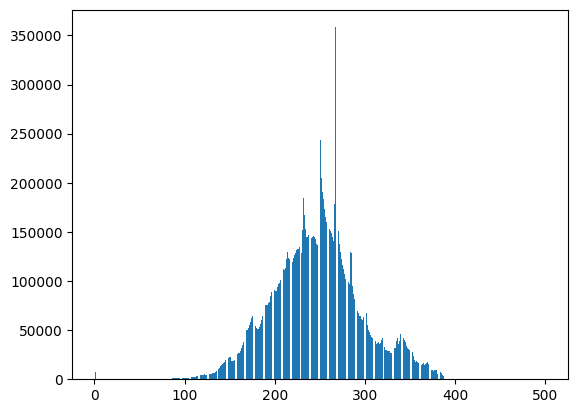

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "torch"

import numpy as np

import mlflow
from hympi_ml.utils import mlflow_log

import hympi_ml.data.model_dataset as md
from hympi_ml.data import RFBand
import hympi_ml.data.cosmirh as c
from hympi_ml.data.ch06 import Ch06Source
from hympi_ml.evaluation.metrics import MeanErrorProfile, VarianceErrorProfile

import hympi_ml.evaluation.figs as figs
import matplotlib.pyplot as plt

mlflow.set_tracking_uri("/home/dgershm1/mlruns")

run_id = "703619f453124fdeaf2015954984c153"
path = mlflow_log.get_artifacts_uri(run_id)[7:]

metric = np.load(f"{path}/test_metrics/test_error_histogram.npy")
print(metric)

plt.bar(x=np.arange(1, 501), height=metric)
plt.show()

datasets = md.get_datasets_from_run(run_id)
datasets['test'][0]

127006720
torch.Size([1024, 1004])


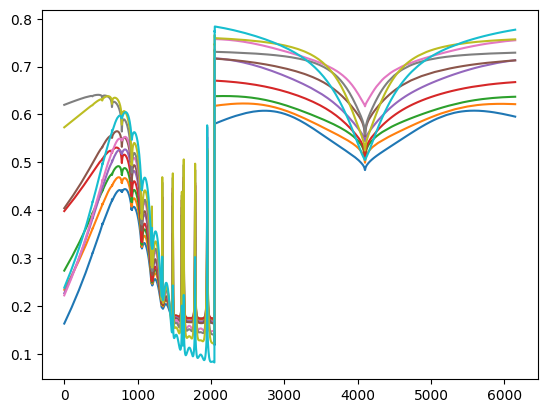

In [93]:

import matplotlib.pyplot as plot
import torch

print(len(datasets['train'])*1024)
print(datasets['test'][0][0]['C1'].shape)

for i in range(10):
    c1 = datasets['test'][i][0]['C1'][0]
    c2 = datasets['test'][i][0]['C2'][0]
    c3 = datasets['test'][i][0]['C3'][0]
    c4 = datasets['test'][i][0]['C4'][0]
    c5 = datasets['test'][i][0]['C5'][0]
    c6 = datasets['test'][i][0]['C6'][0]
    c = torch.concat([c1, c2, c3, c4, c5, c6])
    # print(c.min())
    plot.plot(c)


In [ ]:
import glob
import os

# This guide can only be run with the torch backend.
os.environ["KERAS_BACKEND"] = "torch"

import keras

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from hympi_ml.data.memmap import MemmapSequence

class chds(Dataset):
    def __init__(self, days:list[str], subset:str, transform=None, target_transform=None):
        self.days = days
        self.subset = subset
        self.transform = transform
        self.target_transform = target_transform
        self.batch_size = 1024
        
        files = []
        for day in days:
            files += glob.glob(f"{data_dir}/{day}/*/{subset}.npy")
        self.seq = MemmapSequence.from_files(files)

    def __len__(self):
        return int(len(self.seq) / self.batch_size)

    def __getitem__(self, idx):
        data = torch.from_numpy(self.seq[(idx*self.batch_size):idx*self.batch_size+self.batch_size])
        return (data, data)

data_dir = "/explore/nobackup/people/dgershm1/pbl_fusion/ch06"

print(chds(days=["20060115"], subset="C1").seq.shape)
print(chds(days=["20060115"], subset="C2").seq.shape)
print(chds(days=["20060115"], subset="C3").seq.shape)
print(chds(days=["20060215"], subset="C4").seq.shape)
print(chds(days=["20060115"], subset="C5").seq.shape)
print(chds(days=["20060115"], subset="C6").seq.shape)

# train_dataloader = DataLoader(ds, batch_size=None, shuffle=True, num_workers=4)

# input_layer = keras.Input(shape=(1399,))
# out = input_layer

# out = keras.layers.Flatten()(out)

# out = keras.layers.Dense(50, "gelu")(out)
# out = keras.layers.Dense(1399)(out)

# model = keras.Model(input_layer, out)

# # model.summary()
# model.compile(optimizer="adam", loss="mae")

# # model.fit(train_dataloader)

In [ ]:
# print(chds(days=["20060215"], subset="C4").seq.shape)

import numpy as np

data_dir = "/explore/nobackup/people/dgershm1/pbl_fusion/ch06"

np.load(f"{data_dir}/20060215/1200/C5.npy", mmap_mode="r").shape

In [ ]:
import glob
import os
import shutil

datas = ["C1", "C2", "C3", "C4", "C5", "C6", "MH", "AP", "nature_table", "nature_scalar"]

dirs = glob.glob(f"{data_dir}/*/*")

for data in datas:
    files = len(glob.glob(f"{data_dir}/*/*/{data}.npy"))
    print(f"{data} has {files}!")

# problem_dirs = {}
# for dir in dirs:
#     files = glob.glob(f"{dir}/*")
#     fc = 10
#     for data in datas:
#         if f"{dir}/{data}.npy" not in files:
#             fc -= 1
#             problem_dirs.update({dir: fc})

# ([(k, v) for k, v in problem_dirs.items() if v > 1])


In [4]:
import os

# This guide can only be run with the torch backend.
os.environ["KERAS_BACKEND"] = "torch"

import keras
from keras import layers
from keras import models

# --- 3. Build the 1D CNN Model ---
model = models.Sequential([
    # Input Layer: Defines the expected shape of individual input samples
    # input_shape=(timesteps, features)
    layers.Input(shape=(100, )),
    layers.Reshape(target_shape=(100, 1)),

    # 1D Convolutional Layer
    layers.Conv1D(
        filters=32,          # Number of output filters (feature maps)
        kernel_size=3,       # Size of the convolution window
        activation='relu',   # ReLU activation for non-linearity
        padding='same'       # 'same' padding keeps the output size the same
                             # as the input size after convolution
    ),
    layers.MaxPooling1D(pool_size=2), # Downsamples the input representation

    # Another Conv1D layer
    layers.Conv1D(
        filters=64,
        kernel_size=3,
        activation='relu',
        padding='same'
    ),
    layers.MaxPooling1D(pool_size=2),

    # Flatten the output of the convolutional layers
    layers.Flatten(),

    # Dense layers for regression
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Dropout for regularization to prevent overfitting
    layers.Dense(72, activation='linear') # Output layer for regression (linear activation)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 100, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 50, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 72)             │         9,288 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,552 (861.53 KB)

 Trainable params: 220,552 (861.53 KB)

 Non-trainable params: 0 (0.00 B)